In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# colors = {
#     "en-ru": "blue",
#     "en-fr": "teal",
#     "en-hi": "black",
#     "en-ar": "purple",
#     "en-es": "brown",
#     "en-it": "navy"
# }

colors = {
    "en-ru": "#0000FF",
    "en-fr": "#008080",
    "en-hi": "#808080",
    "en-ar": "#800080",
    "en-es": "#A52A2A",
    "en-it": "000900"
}

markers = {
    "en-ru": "v",
    "en-fr": "X",
    "en-hi": "8",
    "en-ar": "s",
    "en-es": "d",
    "en-it": "D"
}

In [2]:
def load_by_pair_data(path):
    raw_data = pd.read_csv(path, sep=';')
    # Преобразование строки со значениями в список чисел
    raw_data['Value'] = raw_data['Value'].apply(ast.literal_eval)

    # Подготовка данных для построения графиков
    data_by_pair = raw_data.groupby('Language Pair')['Value'].apply(list)
    return data_by_pair

In [3]:
def violin_plot_by_lang(data_by_pair, title, ylabel, xlabel='Слой'):
    # Подготовка данных для построения графиков
    data_by_layer = []

    # Преобразование данных для seaborn
    for lang_pair, values in data_by_pair.items():
        for value_list in values:
            for layer, value in enumerate(value_list, start=1):
                data_by_layer.append({'Language Pair': lang_pair, 'Layer': layer, 'Value': value})

    # Преобразование в DataFrame
    df = pd.DataFrame(data_by_layer)

    # Создание виолончельных графиков в сетке 2x2
    language_pairs = df['Language Pair'].unique()
    num_pairs = len(language_pairs)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)

    # Построение графиков
    for i, lang_pair in enumerate(language_pairs):
        ax = axes[i//2, i%2]
        sns.violinplot(x='Layer', y='Value', data=df[df['Language Pair'] == lang_pair], ax=ax, inner="quart", linewidth=1, alpha=0.75, color=colors[lang_pair])
            
        ax.set_title(f'{title} {lang_pair}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

    plt.legend()
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


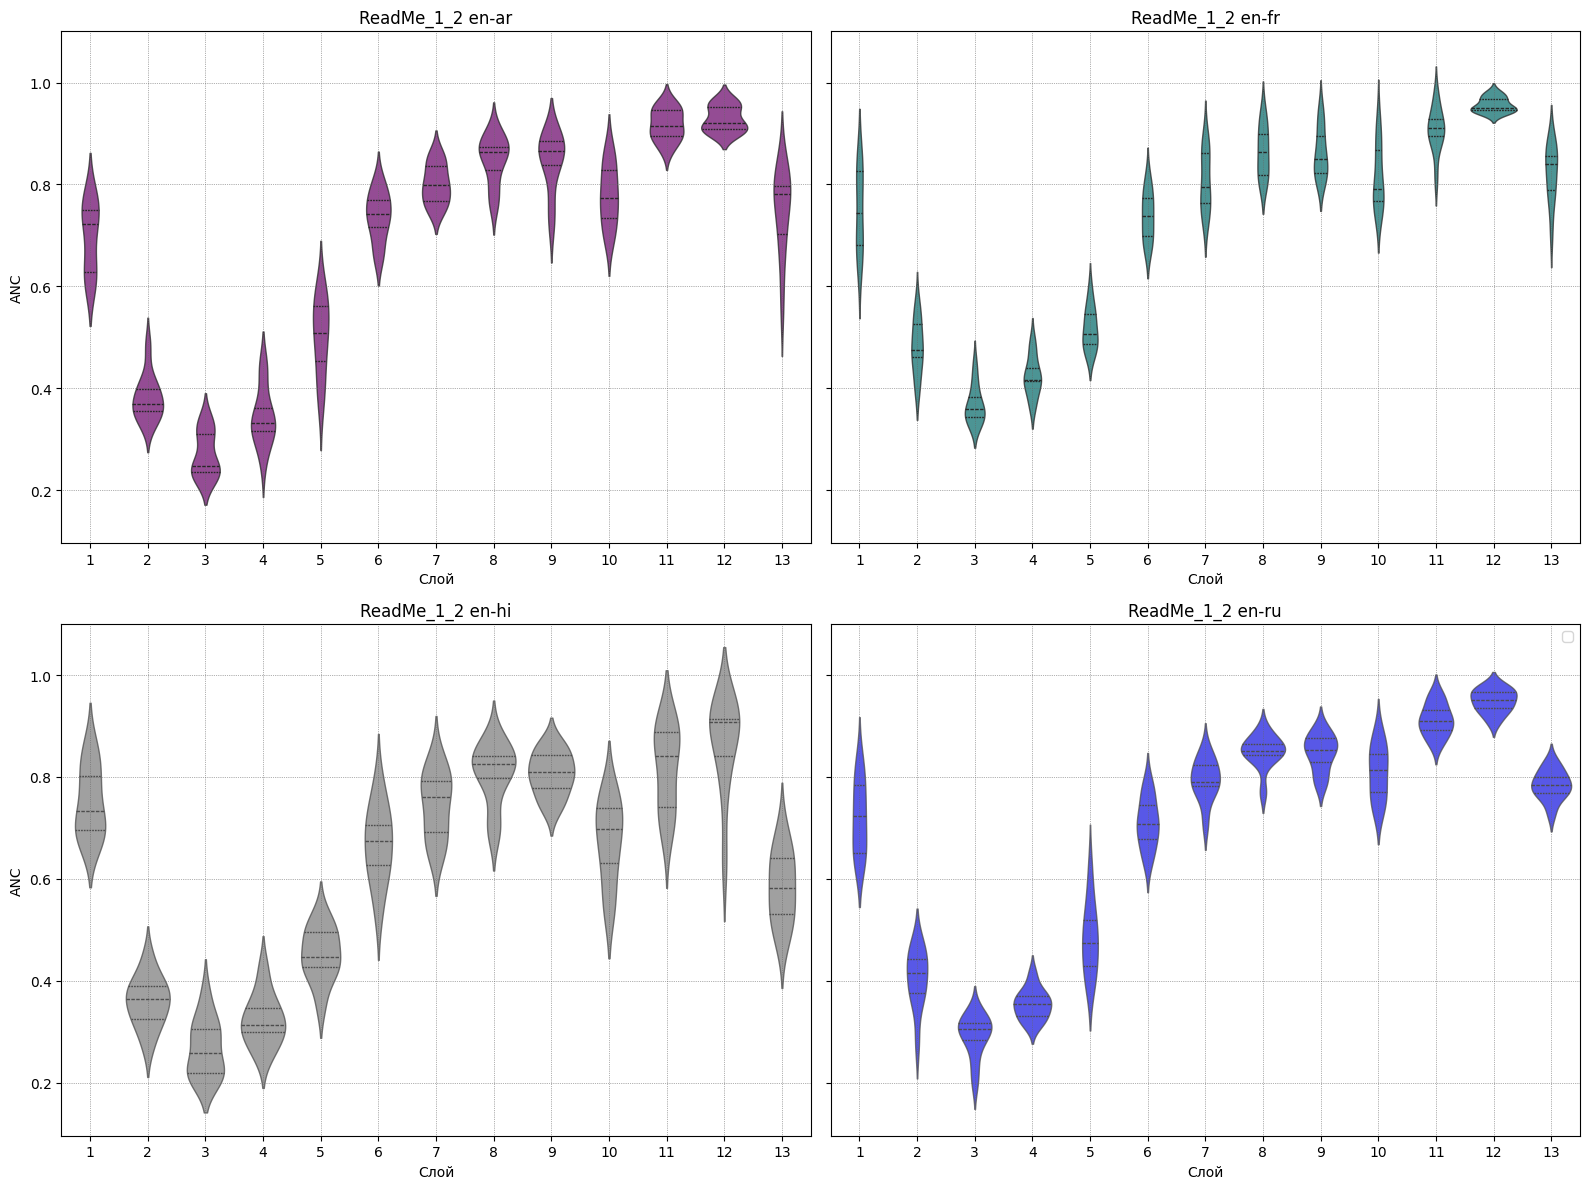

In [5]:
data_by_pair = load_by_pair_data('./parallel/ANC_ReadMe_1_2.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_1_2', 'ANC')

In [6]:
def violin_plot_for_all_lang(data_by_pair, title, ylabel, xlabel='Слой'):
    # Подготовка данных для построения графиков
    data_by_layer = []

    # Преобразование данных для seaborn
    for lang_pair, values in data_by_pair.items():
        for value_list in values:
            for layer, value in enumerate(value_list, start=1):
                data_by_layer.append({'Language Pair': lang_pair, 'Layer': layer, 'Value': value})

    # Преобразование в DataFrame
    df = pd.DataFrame(data_by_layer)

    colors_hue = {
        "en-ru": (0, 0, 1, 0.75),
        "en-fr": (0, 128/255, 128/255, 0.75),
        "en-hi": (0, 0, 0, 0.75),
        "en-ar": (128/255, 0, 128/255, 0.75), 
        "en-es": (165/255, 42/255, 42/255, 0.75), 
        "en-it": (0, 0, 128/255, 0.75) 
    }

    df['Color'] = df['Language Pair'].map(colors_hue)

    # Create the violin plot
    plt.figure(figsize=(16, 12))
    sns.violinplot(x='Layer', y='Value', hue='Language Pair', data=df, palette=colors_hue, split=True, inner="quart", linewidth=1, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(0, max(df['Layer']) + 1))
    plt.legend()
    plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
    plt.show()

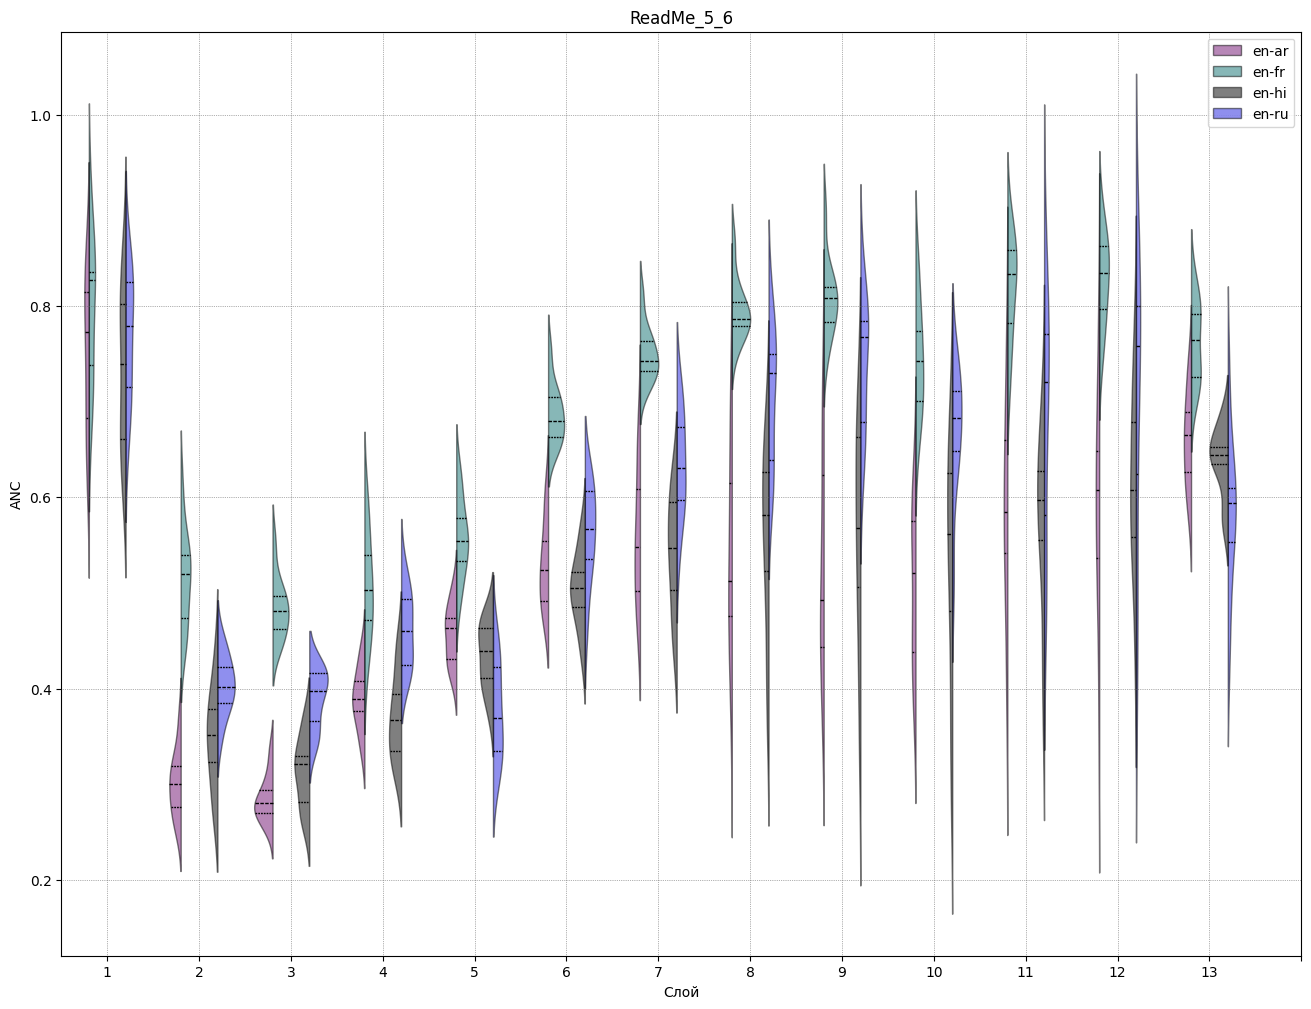

In [18]:
data_by_pair = load_by_pair_data('./parallel/ANC_ReadMe_5_6.txt')
violin_plot_for_all_lang(data_by_pair, 'ReadMe_5_6', 'ANC')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


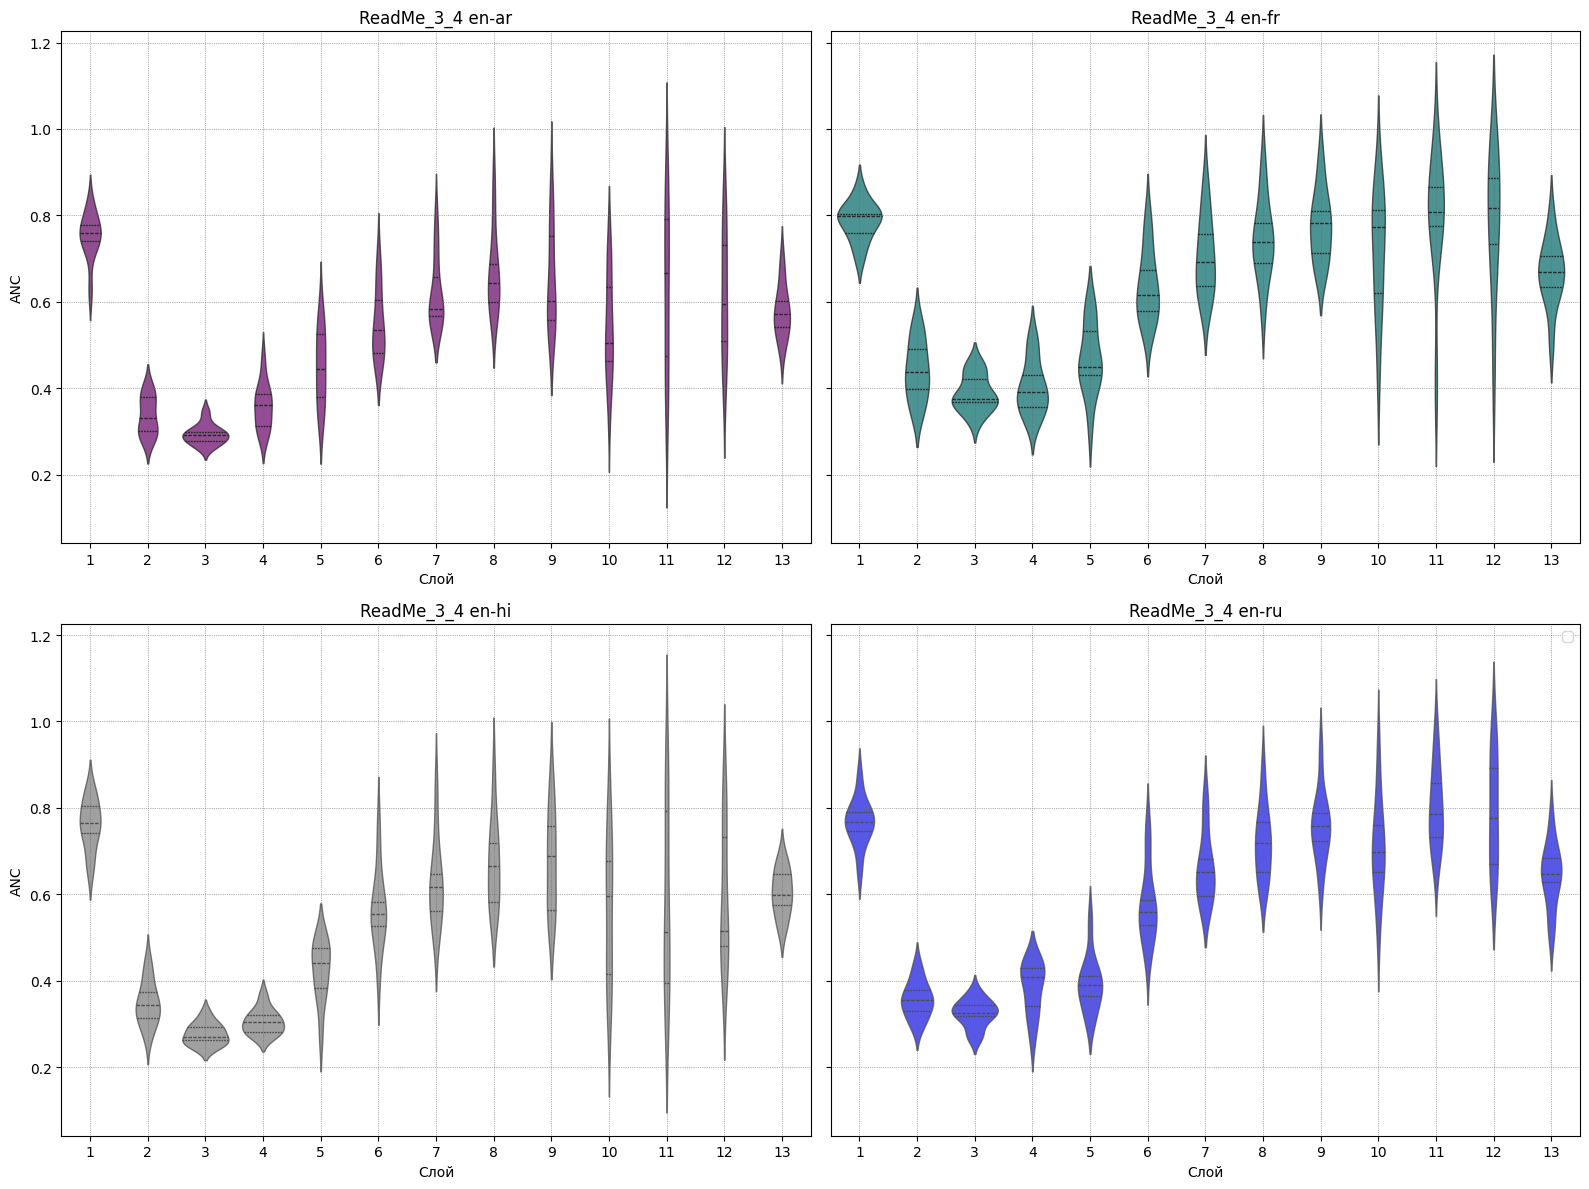

In [15]:
data_by_pair = load_by_pair_data('./parallel/ANC_ReadMe_3_4.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_3_4', 'ANC')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


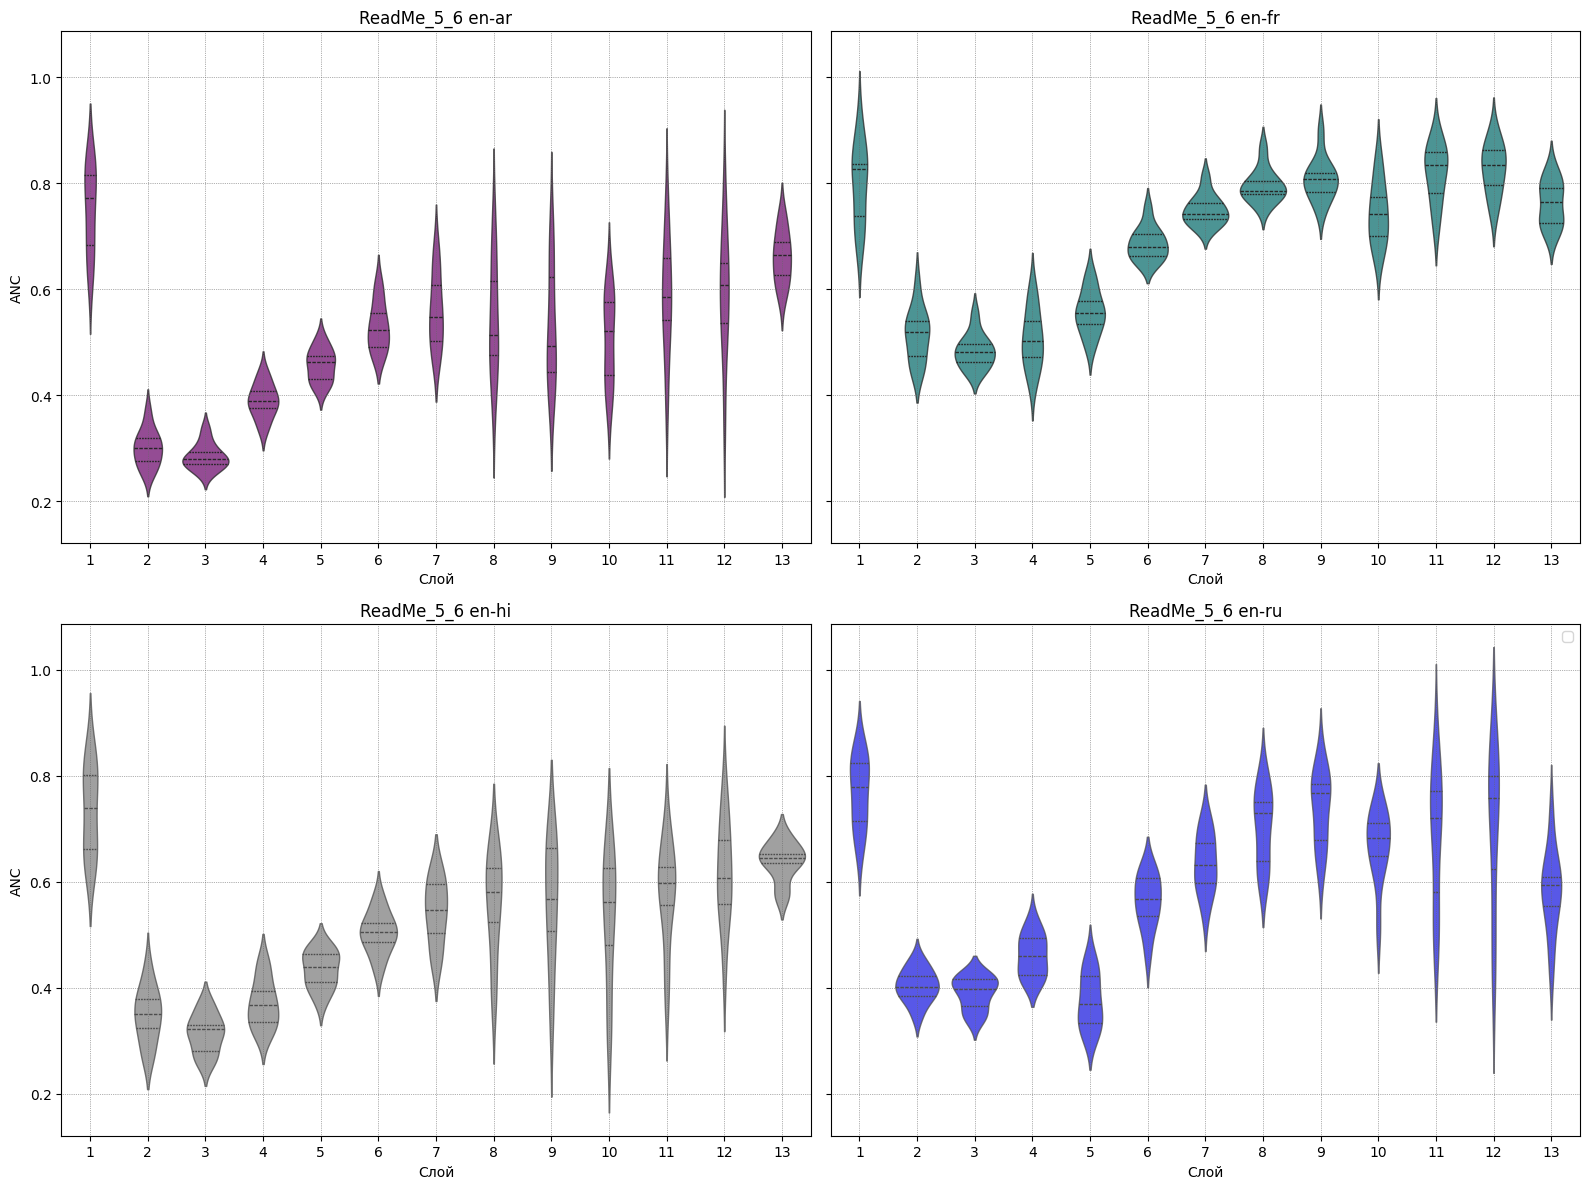

In [16]:
data_by_pair = load_by_pair_data('./parallel/ANC_ReadMe_5_6.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_5_6', 'ANC')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


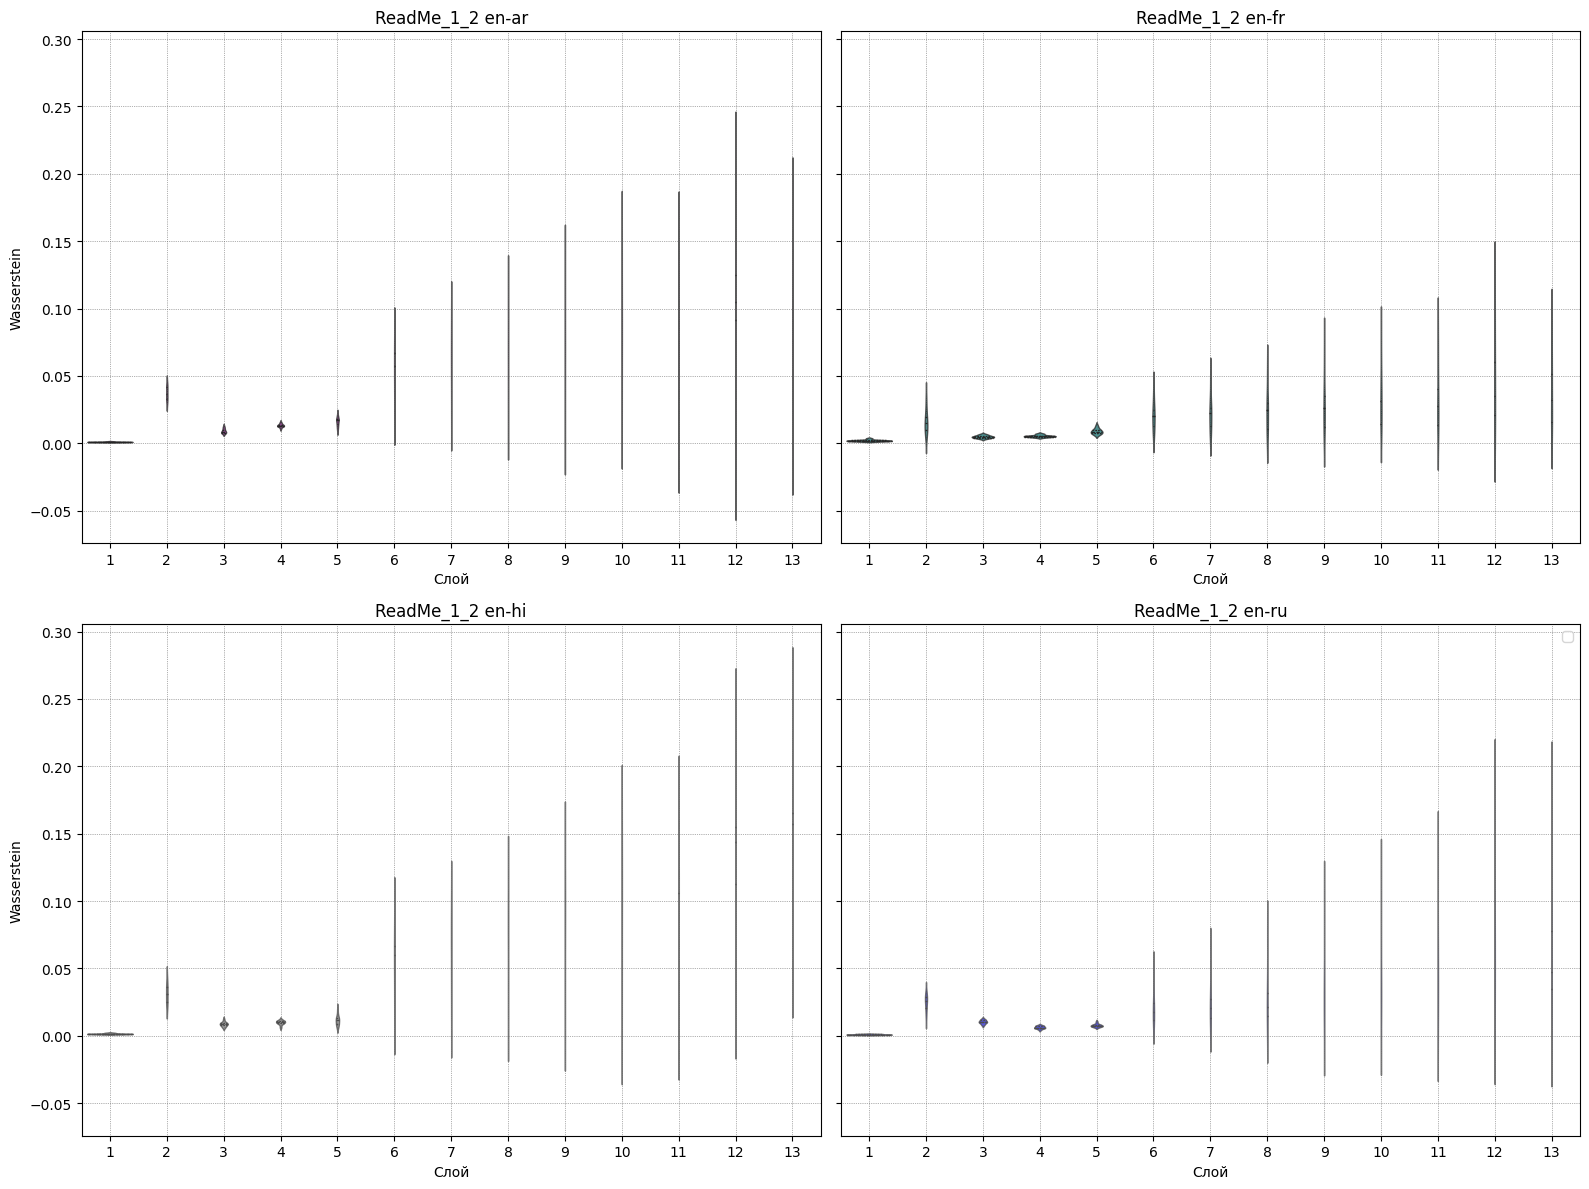

In [11]:
data_by_pair = load_by_pair_data('./parallel/wasserstein_ReadMe_1_2.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_1_2', 'Wasserstein')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


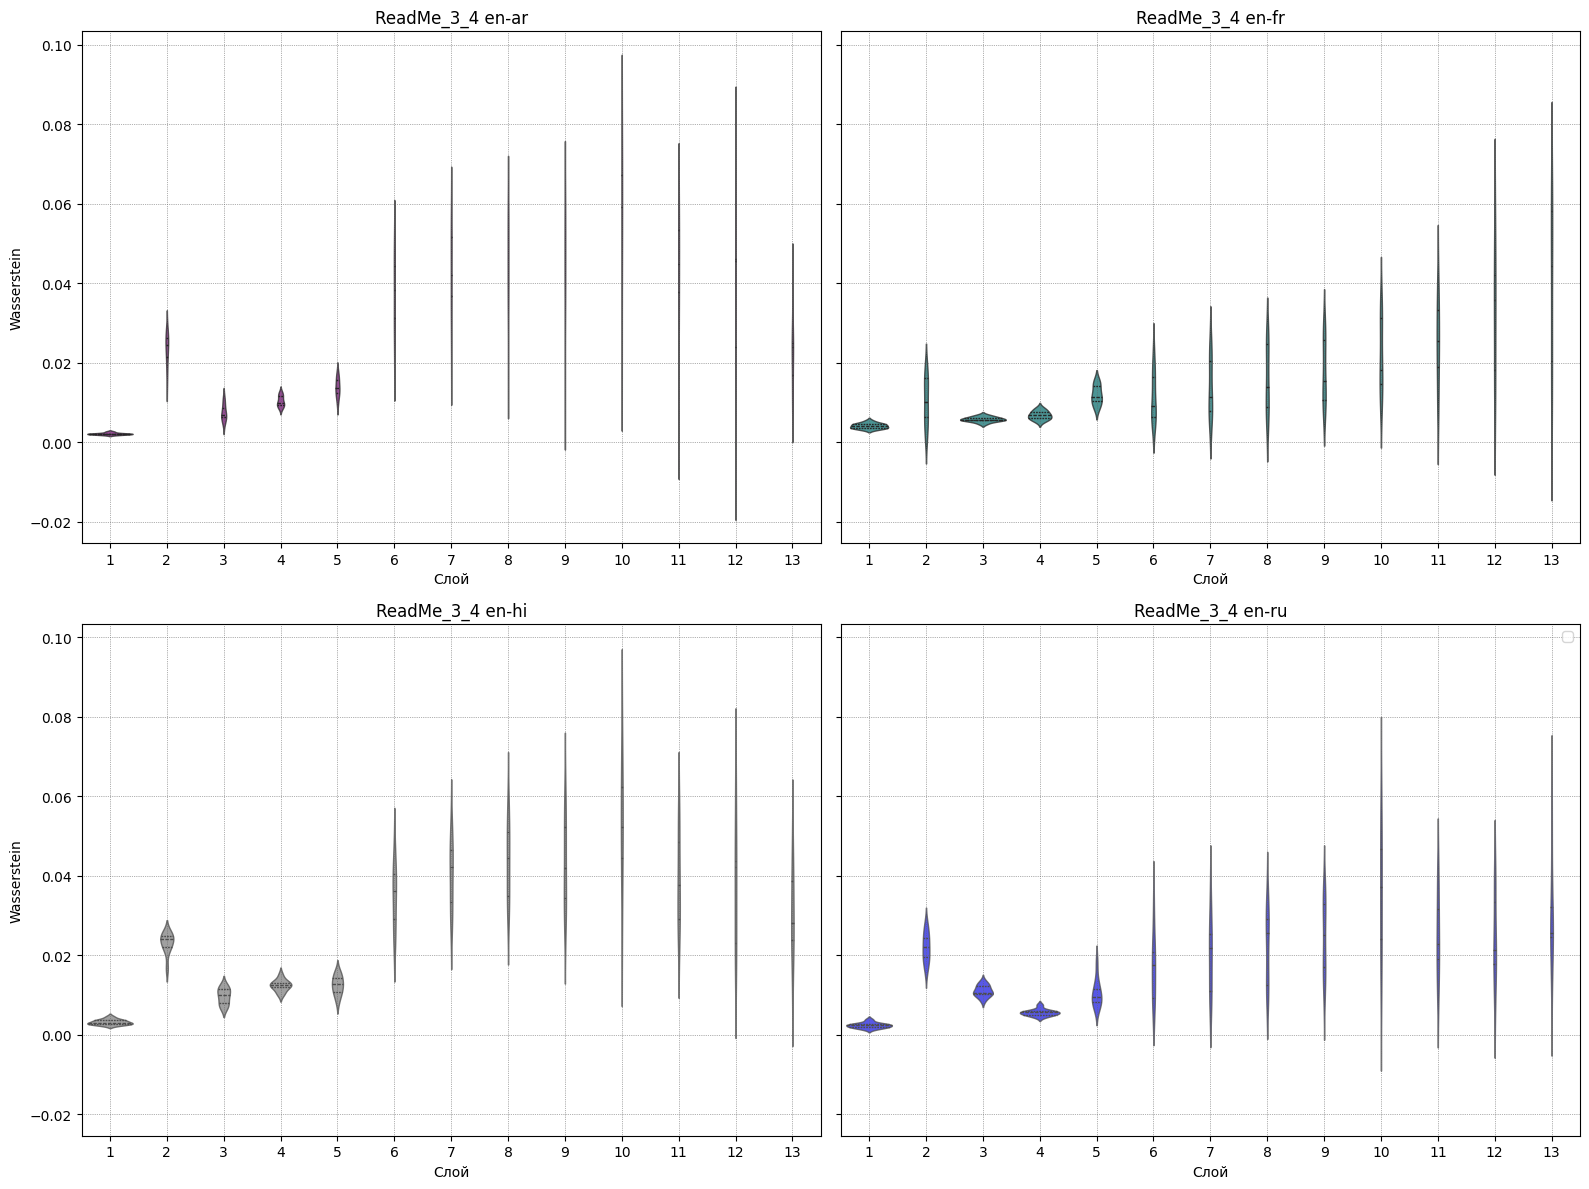

In [12]:
data_by_pair = load_by_pair_data('./parallel/wasserstein_ReadMe_3_4.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_3_4', 'Wasserstein')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


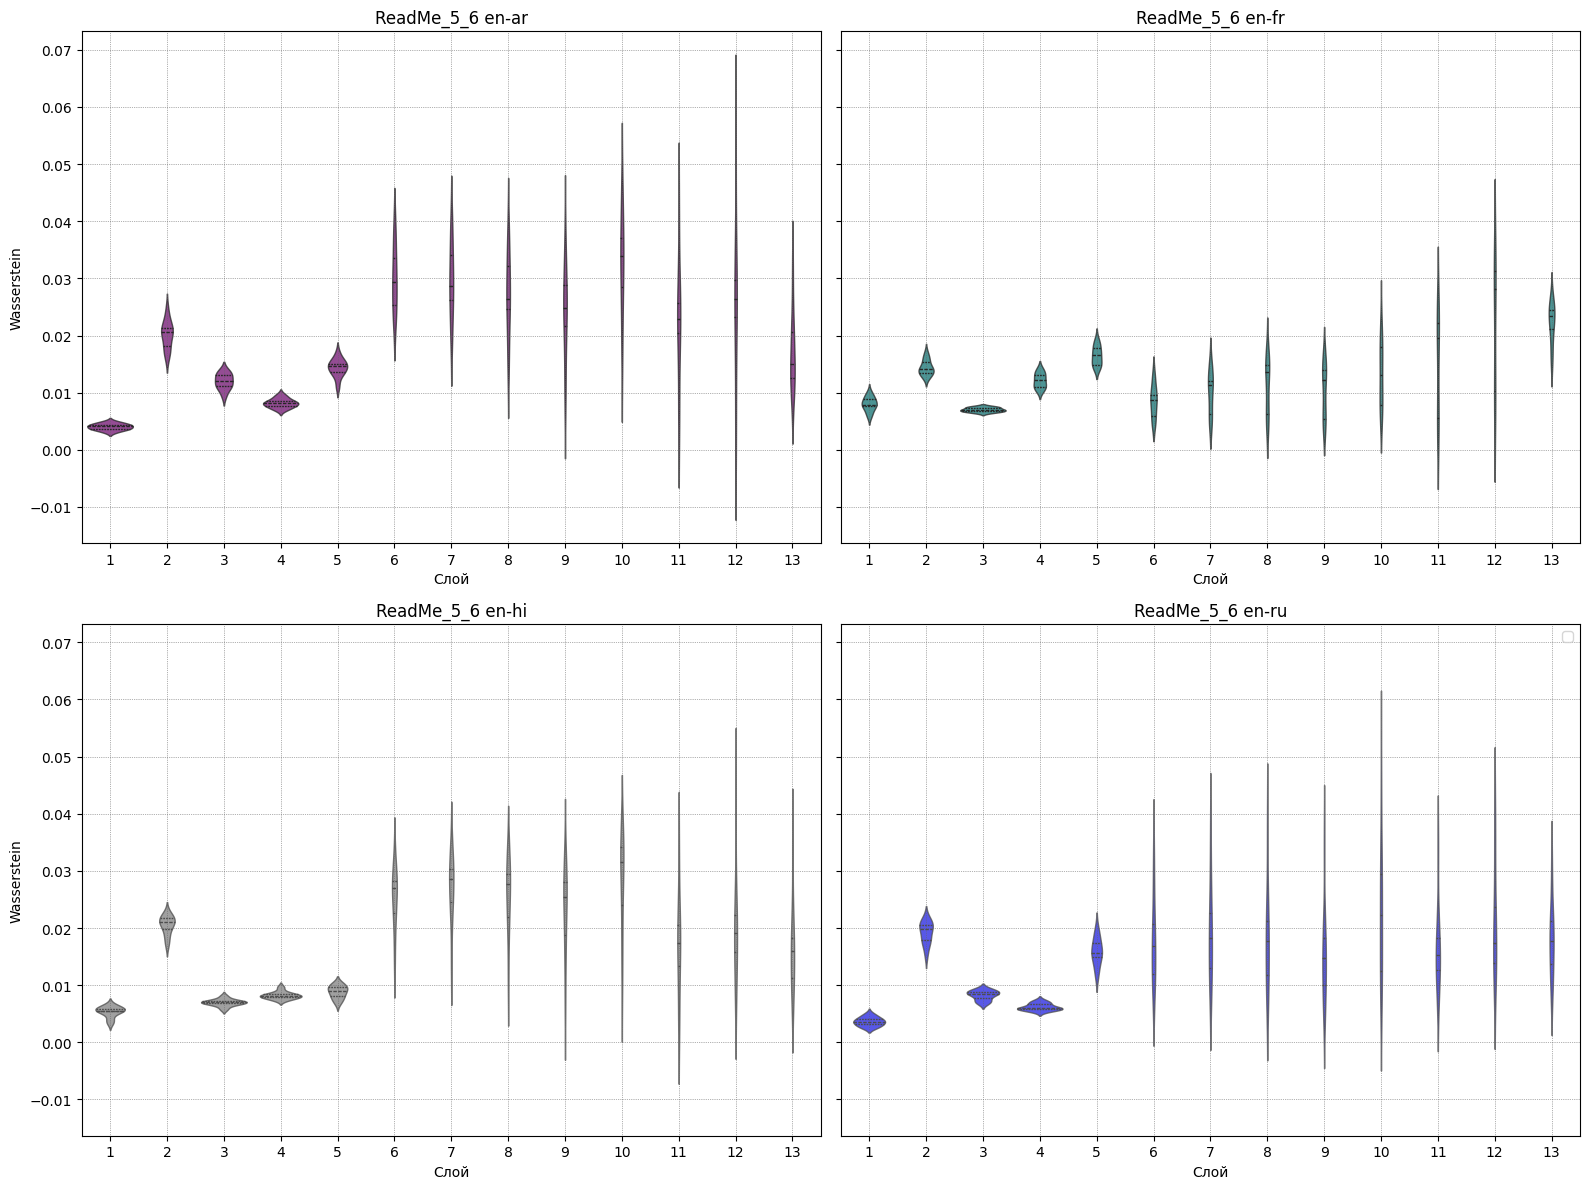

In [13]:
data_by_pair = load_by_pair_data('./parallel/wasserstein_ReadMe_5_6.txt')
violin_plot_by_lang(data_by_pair, 'ReadMe_5_6', 'Wasserstein')

In [ ]:
# Считывание ANC и Wasserstein
def read_data(file_path):
    data = pd.read_csv(file_path, sep=';')
    data['Value'] = data['Value'].apply(ast.literal_eval)
    return data.groupby('Language Pair')['Value'].apply(list)

# Считывание F1 
def read_f1_data(file_path):
    data = pd.read_csv(file_path)
    data['Value'] = data['Value'].apply(ast.literal_eval)
    data.set_index('Language', inplace=True)
    return data.groupby('Language')['Value'].apply(lambda x: list(x)[0])

ANC_XNLI = read_data('plots/parallel/ANC_XNLI.txt')
ANC_Readme = read_data('plots/parallel/ANC_ReadMe.txt')
ANC_VvsW = read_data('plots/parallel/ANC_VvsW.txt')

Wasserstein_XNLI = read_data('plots/parallel/wasserstein_XNLI.txt')
Wasserstein_Readme = read_data('plots/parallel/wasserstein_ReadMe.txt')
Wasserstein_VvsW = read_data('plots/parallel/wasserstein_VvsW.txt')

f1_XNLI = read_f1_data('plots/parallel/f1_XNLI.csv')
f1_Readme = read_f1_data('plots/parallel/f1_ReadMe.csv')
f1_VvsW = read_f1_data('plots/parallel/f1_VvsW.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


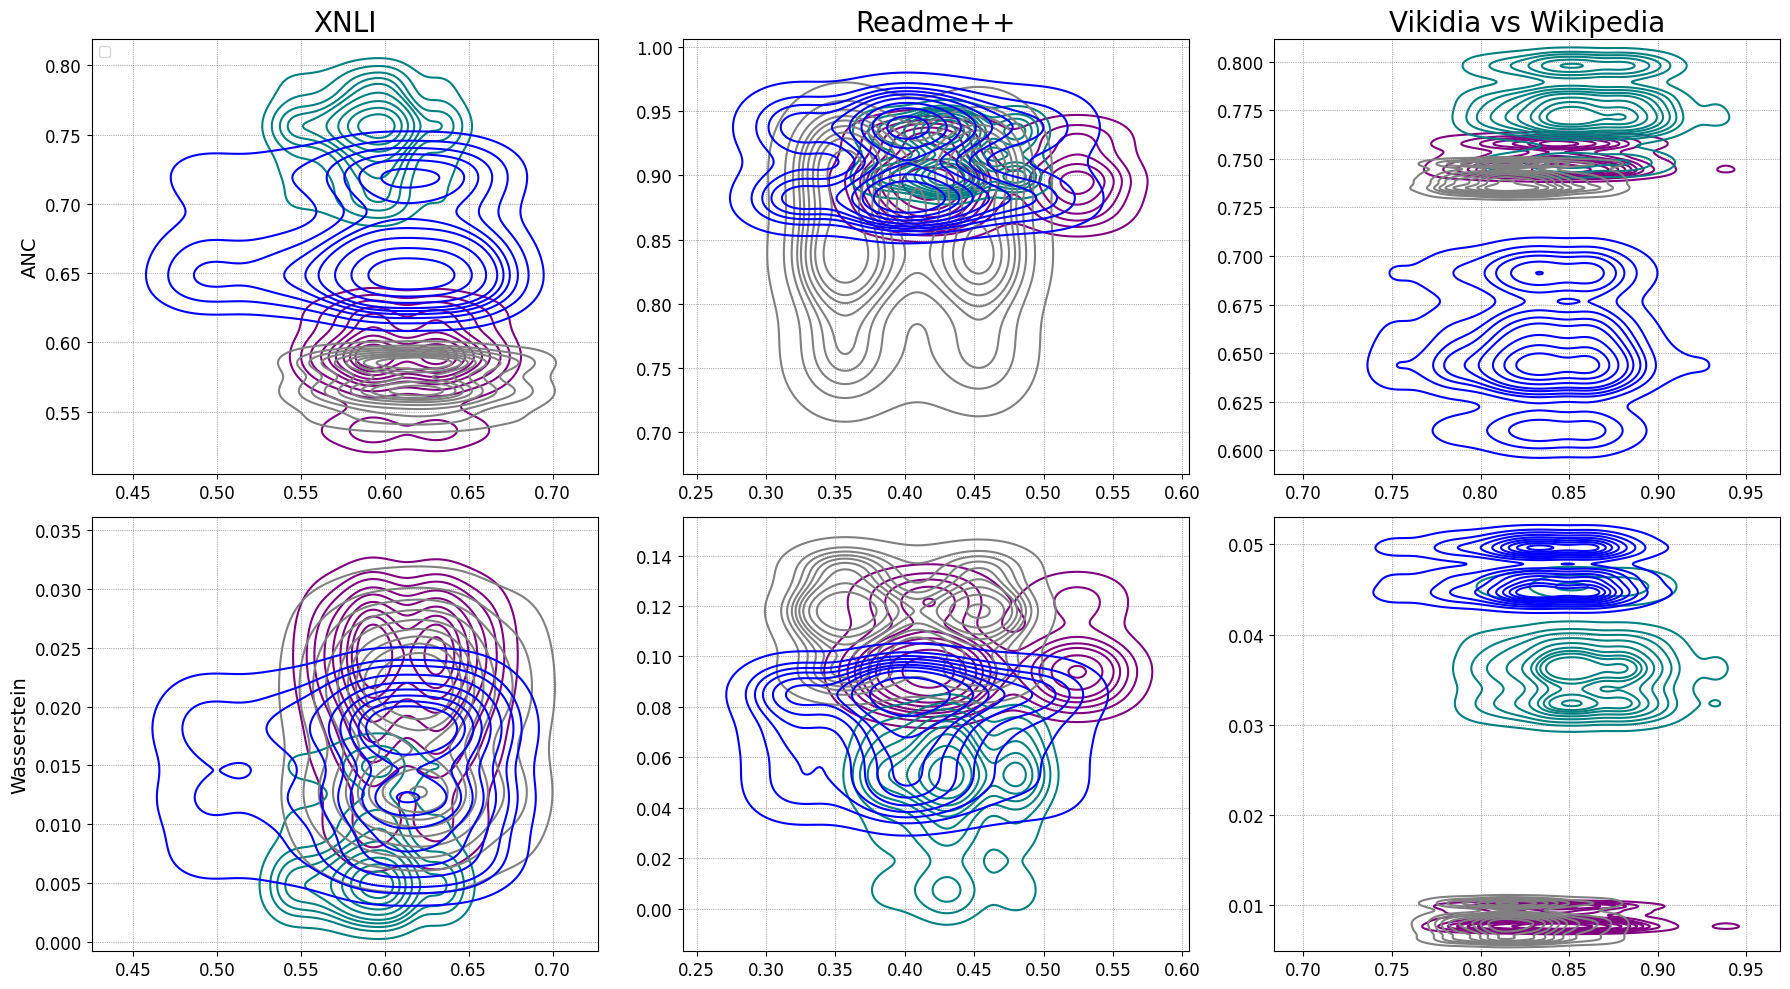

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

datasets_ANC = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

for idx, (title, f1_dict, anc_dict) in enumerate(datasets_ANC):
    ax = axs[0, idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            f1_values = f1_dict[lang]
            anc_values = [anc[-2] for anc in anc_dict[f"en-{lang}"]]

            x, y = np.meshgrid(f1_values, anc_values)
            x = x.flatten()
            y = y.flatten()

            sns.kdeplot(x=x, y=y, ax=ax, label=f"en-{lang}", color=colors[f"en-{lang}"], fill=False)
    
    ax.set_title(title, size=20)
    if idx == 0:
        ax.set_ylabel("ANC", size=14)
        ax.legend(fontsize=10, loc='upper left')
    #ax.set_xlabel("F1 macro", size=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

datasets_wasserstein = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, wasserstein_dict) in enumerate(datasets_wasserstein):
    ax = axs[1, idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            f1_values = f1_dict[lang]
            wasserstein_values = [w[-2] for w in wasserstein_dict[f"en-{lang}"]]

            x, y = np.meshgrid(f1_values, wasserstein_values)
            x = x.flatten()
            y = y.flatten()

            sns.kdeplot(x=x, y=y, ax=ax, label=f"en-{lang}", color=colors[f"en-{lang}"], fill=False)
    
    #ax.set_title(title, size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=14)
        #ax.legend(fontsize=10, loc='upper left')
    #ax.set_xlabel("F1 macro", size=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
    
plt.tight_layout()
plt.show()
